In [416]:
import math

def exact_divisibility_two(x):
    d = 0
    while x%2 == 0:
        x /= 2
        d+=1
    return d

def generate_collatz_set(k, v1, n):
    collatz_set = []
    if n<1 or v1%2==0:
        return collatz_set
    vi = v1
    collatz_set.append(vi)
    for i in range(n-1):
        vi = k*vi+1
        while vi%2 == 0:
            vi /= 2
        if vi in collatz_set:
            return [] if len(collatz_set)<n else collatz_set
        elif vi == 1:
            #collatz_set.append(int(vi))
            return [] if len(collatz_set)<n else collatz_set
        else:
            collatz_set.append(int(vi))
    return collatz_set

def beta(integer_set, k):
    l = len(integer_set)
    if l == 0:
        return 1
    prod=1
    for i in range(l):
        element = integer_set[i]
        prod *= (1+1/(k*element))
    return prod

def engel(k,a1,v1,n):
    return v1 if n==1 else (k/2)**(n-2)*((k*v1+1)/2**a1+1/(k-2))-1/(k-2)

def engel_beta(k,v1,n):
    collatz_set = generate_collatz_set(k, v1, n)
    l=len(collatz_set)
    if (l < n):
        return 1
    a=calculate_a(collatz_set, k)
    #a=int(n*math.log(k,2)+math.log(v1,2))+1
    a1=a-n+2
    if a1 == 0:
        a1 = 1
    #print("{0} {1} {2} {3}".format(collatz_set, a, n, a1))
    b = 1/((k-2)*v1)*(1+(2**a1-2)/k)-2**(a1-1)/((k-2)*v1)*(2/k)**n+1
    if b > 4/3:
        b = beta(collatz_set, k)
    return b

def calculate_a(collatz_set, k):
    l = len(collatz_set)
    if l <= 1:
        return 0
    a = 0
    
    for i in range(l-1):
        vi = collatz_set[i]
        a += exact_divisibility_two(k*vi+1)
    return a

collatz_set = generate_collatz_set(3,9,2)
#print(collatz_set)
#print(calculate_a(collatz_set, 3))


In [417]:
import plotly.graph_objects as go
import numpy as np
import csv

#set1 = generate_collatz_set(5, 67, 7)
#print(set1)
#myset=[661,31,47,71]
#print(beta(myset,3))
#print(engel(3,6,661,1))
#print(engel(5,4,67,7))
#print(engel_beta(3,661,4))
#print(engel_beta(11,1,100))

max=60
x = np.linspace(0, max-1, max)
y = np.linspace(0, max-1, max)
X, Y = np.meshgrid(x, y)
X = X.astype(int)
Y = Y.astype(int)
Z = np.zeros(shape=(max,max))
k = 3

def fn_plot_beta(x, y):
    v1 = 2*x+1
    n = y+1
    collatz_set = generate_collatz_set(k, v1, n)
    #print("{0} {1} {2} {3} {4}".format(v1, n, collatz_set, beta(collatz_set, k), float(engel_beta(k,v1,n))))
    return float(beta(collatz_set, k))

def fn_plot_engel_beta(x, y):
    v1 = 2*x+1
    n = y+1
    collatz_set = generate_collatz_set(k, v1, n)
    return float(engel_beta(k,v1,n))

fn_vectorized_beta = np.vectorize(fn_plot_beta)
Z_beta = fn_vectorized_beta(X, Y)

fn_vectorized_engel_beta = np.vectorize(fn_plot_engel_beta)
Z_engel_beta = fn_vectorized_engel_beta(X, Y)

#for i in range(1, 1000, 2):
#    print("{0} {1}".format(i,engel(5,4,i,7)))

In [421]:
fig = go.Figure(data=[
    go.Surface(z=Z_beta_engel, x=X, y=Y, showscale=False, opacity=0.9)
])

#fig = go.Figure(data=[
#    go.Surface(z=Z_engel_beta-Z_beta, x=X, y=Y, showscale=False, opacity=0.9)
#])

fig.update_layout(title='Engel Beta', autosize=True,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()


In [419]:
arr_csv = [[]]
for y in range(Z_engel_beta.shape[1]):
    for x in range(Z_engel_beta.shape[0]):
        arr_csv.append([2*x+1,y+1,Z_beta[y,x],Z_engel_beta[y,x]])
        #arr_csv.append([x,y,Z[x,y]])
#print(arr_csv)


with open("c:/temp/collatz_beta.csv", "w", newline='') as my_csv:
    csvWriter = csv.writer(my_csv, delimiter=',')
    csvWriter.writerow(["v1", "n", "beta(v1,n,k={})".format(k)])
    csvWriter.writerows(arr_csv)

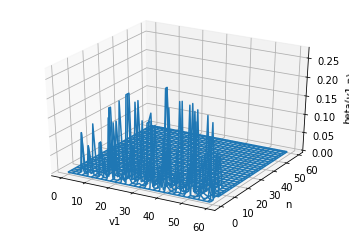

In [420]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z_engel_beta-Z_beta)
ax.set_xlabel('v1')
ax.set_ylabel('n')
ax.set_zlabel('beta(v1,n)')
plt.show()